<a href="https://colab.research.google.com/github/ehgeraldo/analise_acao_taeesa_taee11/blob/master/Covid_virus_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de dados sobre a pandemia mundial do Covid_19, base de dados escolhido da referência abaixo:**


**Vale ressaltar que a intenção é aplicação de dataScience.**

In [0]:
from google.colab import files
from IPython.display import Image

In [34]:
upload = files.upload()

Saving Corona_virus_image.jpg to Corona_virus_image.jpg


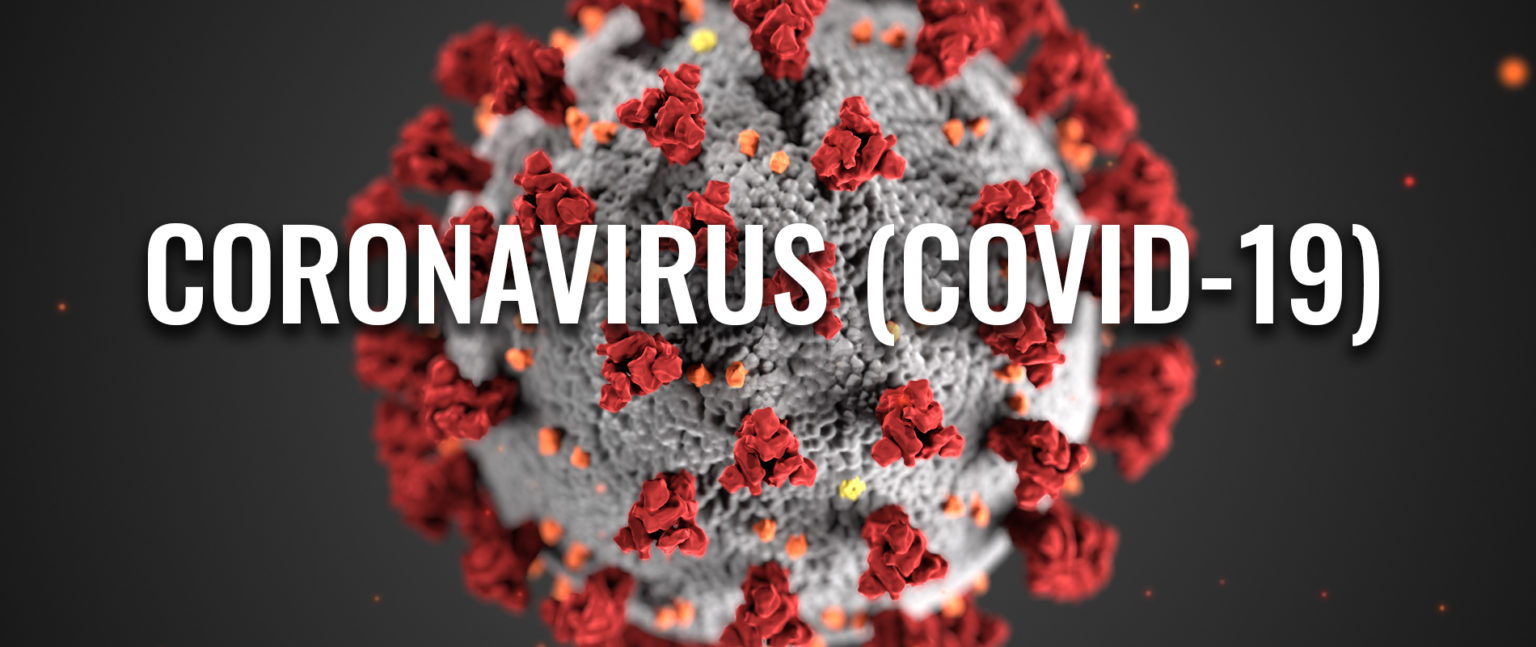

In [35]:
Image('Corona_virus_image.jpg', width = 1300)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# importar as bibliotecas necessárias:

# importação de dados para o DataFrame:
import pandas as pd
file = '/content/drive/My Drive/covid_19_clean_complete.csv'
df = pd.read_csv(file, sep=',', parse_dates=['Date'])


In [0]:
# Ignorar qualquer mensagem de erro no banco de dados.
import warnings
warnings.filterwarnings('ignore')

In [40]:
# ver as 5 primeiras entradas
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


**Interpretação do banco de dados:**

**Temos posição geográfica por países com data e número de casos de covid**

 **confirmados de curados e número de mortes.** 

In [41]:
# Representação dos tipos de variáveis em cada uma das colunas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  6080 non-null   object        
 1   Country/Region  19836 non-null  object        
 2   Lat             19836 non-null  float64       
 3   Long            19836 non-null  float64       
 4   Date            19836 non-null  datetime64[ns]
 5   Confirmed       19836 non-null  int64         
 6   Deaths          19836 non-null  int64         
 7   Recovered       19836 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.2+ MB


In [42]:
# Representação de número de linhas por colunas do Data Frame.
df.shape

(19836, 8)

In [43]:
# Verificação se há algum dado ausente no banco de dados e quantos seriam.
df.isnull().sum()

Province/State    13756
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [44]:
# Contagem de dados por cada coluna.
df.count()

Province/State     6080
Country/Region    19836
Lat               19836
Long              19836
Date              19836
Confirmed         19836
Deaths            19836
Recovered         19836
dtype: int64

In [45]:
# Descrição estatística de cada um dos dados por coluna.
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000
mean,21.456103,22.498687,880.324662,40.387225,225.932799
std,24.785712,70.688066,8331.133731,492.369584,2645.682524
min,-51.796300,-135.000000,0.000000,0.000000,0.000000
25%,7.000000,-19.020800,0.000000,0.000000,0.000000
50%,23.685000,20.902977,1.000000,0.000000,0.000000
75%,41.204400,81.000000,62.000000,0.000000,2.000000
max,71.706900,178.065000,366614.000000,16523.000000,64014.000000


In [0]:
# Casos ativos = Casos confirmados - Mortes - Casos recuperados.
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [0]:
# Substituindo a nomeclatura Mainland no banco de dado por China.
df['Country/Region'] = df['Country/Region'].replace('Mainland China', 'China')

In [0]:
# Preenchimento dos valores de missing values
df[['Province/State']] = df[['Province/State']].fillna('')
df[['Confirmed', 'Deaths', 'Recovered', 'Active']] = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

In [0]:
# Convertendo o tipo dos valores da coluna Recovered.
df['Recovered'] = df['Recovered'].astype(int)

In [50]:
# imprimindo 5 primeiras linhas
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0



**Examinando os dados temporais:**

In [51]:
df.Date.describe()

count                   19836
unique                     76
top       2020-01-25 00:00:00
freq                      261
first     2020-01-22 00:00:00
last      2020-04-06 00:00:00
Name: Date, dtype: object


**Agrupando dados para termos referências númericas:**

In [0]:
# Obtém o número de casos confirmados, mortes, recuperados e ativos agrupado por data e por região.
df_agrupado = df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [53]:
# Ordena o dataframe por mais casos confirmados (maior para o menor).
df_agrupado.sort_values(by='Confirmed', ascending=False)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
13971,2020-04-06,US,366614,10783,19581,336250
13787,2020-04-05,US,337072,9619,17448,310005
13603,2020-04-04,US,308850,8407,14652,285791
13419,2020-04-03,US,275586,7087,9707,258792
13235,2020-04-02,US,243453,5926,9001,228526
...,...,...,...,...,...,...
8756,2020-03-09,Mauritania,0,0,0,0
4967,2020-02-17,Zimbabwe,0,0,0,0
8754,2020-03-09,Mali,0,0,0,0
4968,2020-02-18,Afghanistan,0,0,0,0


In [0]:
# Obtém o número de casos confirmados, mortes, recuperados e ativos agrupando por região.
df_group_paises = df.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [55]:
# Ordena por paises com mais casos confirmados.
df_group_paises.sort_values(by='Confirmed', ascending=False)

,Country/Region,Confirmed,Deaths,Recovered,Active
36,China,4683417,165756,2847170,1670491
171,US,2831915,64777,98681,2668457
84,Italy,1942859,206052,266247,1470560
156,Spain,1472568,123441,295573,1053554
65,Germany,1142172,12016,217756,912400
...,...,...,...,...,...
103,Malawi,19,0,0,19
166,Timor-Leste,16,0,0,16
181,Western Sahara,8,0,0,8
143,Sao Tome and Principe,4,0,0,4


In [0]:
# Agrupa quantidade de casos recuperados, mortes e ativos por data.
temp = df.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()

In [0]:
# Remodela o dataframe com variável e valor para ter quantidades de recuperados, mortos e ativos.
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')

In [27]:
temp.head(20)

,Date,Case,Count
0,2020-01-22,Recovered,28
1,2020-01-23,Recovered,30
2,2020-01-24,Recovered,36
3,2020-01-25,Recovered,39
4,2020-01-26,Recovered,52
5,2020-01-27,Recovered,61
6,2020-01-28,Recovered,107
7,2020-01-29,Recovered,126
8,2020-01-30,Recovered,143
9,2020-01-31,Recovered,222


In [58]:
# habilita modo offline.
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [0]:
# Definindo o renderizador para definir a representação do gráfico:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [0]:
# Cores
recuperados = '#21bf73'
mortes = '#ff2e63'
ativos = '#fe9801'

In [65]:
import plotly.express as px
fig = px.area(temp, 
              x="Date", 
              y="Count", 
              color='Case', 
              height=600,
              title='Casos ao longo do tempo',
              color_discrete_sequence = [recuperados, mortes, ativos])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

**Análise para os casos ao longo do tempo:**

In [0]:
import numpy as np

In [67]:
# Mapa de Choropleth é um mapa composto por polígonos coloridos. 
# É usado para representar variações espaciais de uma quantidade

fig = px.choropleth(df_agrupado,                                                   # casos agrupados por país
                    locations="Country/Region",                                    # definindo as regiões no mapa
                    locationmode='country names',                                  # define o modo de localização para todas regiões
                    color=np.log(df_agrupado["Confirmed"]),                        # define a cor pelo o valor de casos confirmados (aplica o log)
                    hover_name='Country/Region',                                   # define o texto interativo com o nome da região
                    hover_data=["Confirmed", "Deaths"],                            # define o texto interativo com o numero de casos confirmasos e mortes
                    animation_frame=df_agrupado["Date"].dt.strftime('%d-%m-%Y'),   # define o animate_frame com as datas
                    title='Casos ao longo do tempo',                               # define título
                    color_continuous_scale=px.colors.sequential.Magenta)           # define a paleta de cores
fig.update_layout(autosize=False, width=1200, height=800)                          # define tamanho da figura
fig.show()

In [78]:
!pip install plotly==4.5.2

In [105]:
# imprime as 5 primeiras linhas
completo.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
19575,,Afghanistan,33.0000,65.0000,2020-04-06,367,11,18,338
19576,,Albania,41.1533,20.1683,2020-04-06,377,21,116,240
19577,,Algeria,28.0339,1.6596,2020-04-06,1423,173,90,1160
19578,,Andorra,42.5063,1.5218,2020-04-06,525,21,31,473
19579,,Angola,-11.2027,17.8739,2020-04-06,16,2,2,12


**Picos de casos confirmados e mortes:**

In [104]:
fig = px.line(df_agrupado,
              x="Date",
              y="Confirmed",
              color='Country/Region',
              height=600,
              title='Casos Confirmados',
              color_discrete_sequence = px.colors.qualitative.Dark2 )
fig.show()

fig = px.line(df_agrupado,
              x="Date",
              y="Deaths",
              color='Country/Region',
              height=600,
              title='Mortes Confirmadas',
              color_discrete_sequence = px.colors.qualitative.Dark2)
fig.show()

**Represetação do Gráfico com Folium:**

In [0]:
# Obtém os dados do último dia da base de dados com a representação geográfica.
temp = df[df['Date'] == max(df['Date'])]

In [0]:
import folium

In [115]:
m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(temp)):
    folium.Circle(
        location=[temp.iloc[i]['Lat'], temp.iloc[i]['Long']],
        color='crimson', fill='crimson',
        tooltip =   '<li><bold>Country : '+str(temp.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(temp.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(temp.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(temp.iloc[i]['Deaths']),
        radius=int(temp.iloc[i]['Confirmed'])**1.1).add_to(m)
m